In [2]:
datapath = "../data"

# Process the tissue attributes
In this code we load tissue gene attributes by several datafiles. We apply missing values fixing and data scaling with `sklearn.preprocessing.StandardScaler` on the `BIO` and `CCcfs` attributes, while no normalization and fixing on embedding attributes (`EmbN2V_128`). The attributes are all merged in one matrix by the `feature_assemble` function as input for the prediction model building.

In [3]:
pd.read_csv(os.path.join(datapath,"Lung_HELP.csv"), index_col=0).value_counts(normalize=False)

label
sNE      13847
aE        2849
E         1235
Name: count, dtype: int64

In [6]:
tissue='Lung'
import pandas as pd
from help.preprocess.loaders import feature_assemble
import os
label_file = os.path.join(datapath, f'{tissue}_HELP.csv')
features = [{'fname': os.path.join(datapath, f'{tissue}_BIO.csv'), 'fixna' : True, 'normalize': 'std'},
            {'fname': os.path.join(datapath, f'{tissue}_CCcfs.csv'), 'fixna' : True, 'normalize': 'std'},
            {'fname': os.path.join(datapath, f'{tissue}_EmbN2V_128.csv'), 'fixna' : None, 'normalize': None}]
df_X, df_y = feature_assemble(label_file = label_file, 
                              features=features, subsample=False, seed=1, saveflag=False, verbose=True)
pd.merge(df_X, df_y, left_index=True, right_index=True, how='outer')

Loading ../data/Lung_HELP.csv
Majority sNE 13847 minoriy E 1235


FileNotFoundError: [Errno 2] No such file or directory: '../data/Lung_BIO.csv'

# Prediction
We process k-fold cross validation of a LightGBM classifier (`n_splits=5`), and then storing predictions and printing metrics.

5-fold: 100%|██████████| 5/5 [00:31<00:00,  6.35s/it]


,measure
ROC-AUC,0.9566±0.0055
Accuracy,0.9476±0.0026
BA,0.8344±0.0085
Sensitivity,0.7021±0.0173
Specificity,0.9667±0.0027
MCC,0.6321±0.0152
CM,"[[872, 370], [533, 15461]]"


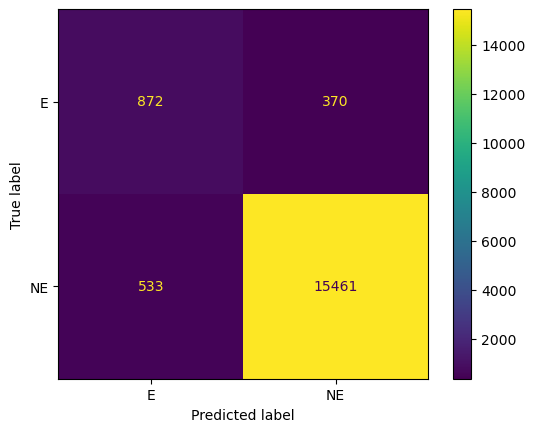

In [9]:
from help.models.prediction import predict_cv
df_scores_means, df_scores = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, outfile='pred_Kidney.csv')
df_scores_means

# Prediction with undersampling
Due to the strong unbalancing between the two classes, we can redo prediction model building by undersampling the majority class: this is done by re-applying the `feature_assemble` function with parameter `subsample=True`: this flag set causes the majority class to be downsampled to 4 times the dimension of the minority class. The we re-apply the k-fold cross validation of the a LightGBM classifier.

Loading ../data/label_Kidney.csv
Majority NE 16678 minoriy E 1253
[Kidney_BIO.csv] found 0 Nan...
[Kidney_BIO.csv] Normalization with std ...
[Kidney_CCcfs.csv] found 0 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] No normalization...
6043 labeled genes over a total of 6265
(6043, 3459) data input


5-fold: 100%|██████████| 5/5 [00:17<00:00,  3.57s/it]


,measure
ROC-AUC,0.9534±0.0032
Accuracy,0.9136±0.0097
BA,0.8689±0.0213
Sensitivity,0.7930±0.0425
Specificity,0.9448±0.0060
MCC,0.7361±0.0329
CM,"[[985, 257], [265, 4536]]"


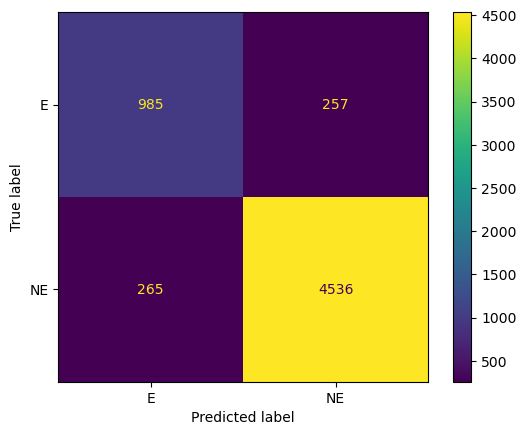

In [10]:
df_X, df_y = feature_assemble(label_file = label_file, 
                              features=features, subsample=True, seed=1, verbose=True)
df_scores_means, df_scores = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, outfile='pred_Kidney.csv')
df_scores_means